In [4]:
%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


import h5py
#from read_raw import load_from_file
import maxlab_analysis as mla

import time
from scipy.signal import find_peaks
import scipy.stats as stats
from sklearn.decomposition import PCA, NMF
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE



# PCA 10 dimensions

In [5]:
filestem = "div21"
filename = filestem + ".data.raw.h5"

In [7]:
X = np.load(filename + '.npy')
t = X[:, 0]
X = X[:, 1::5]
print(X)

FileNotFoundError: [Errno 2] No such file or directory: 'div21.data.raw.h5.npy'

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

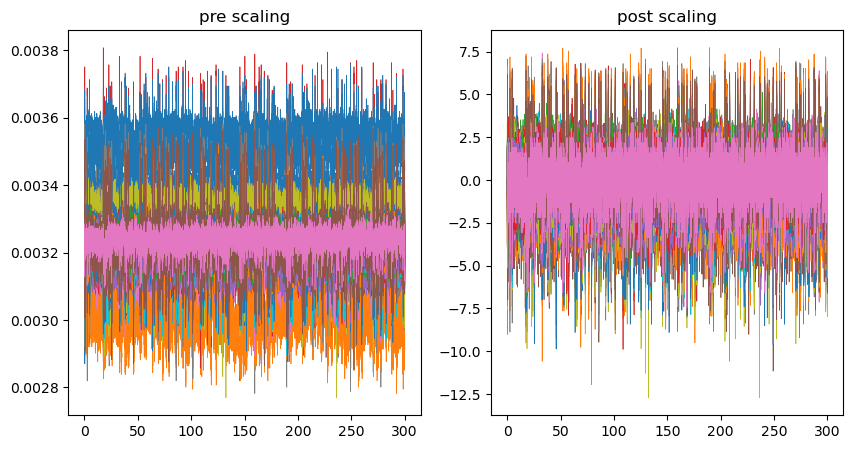

In [10]:
#Plot a subset of the channels
plt.figure(figsize = (10, 5))
plt.subplot(121)
plt.plot(t[:], X[:, ::10], linewidth = 0.5)
plt.title('pre scaling')

plt.subplot(122)
plt.plot(t[:], X_scaled[:, ::10], linewidth = 0.5)
plt.title('post scaling')
plt.show()

[0.38633305 0.05145557 0.01607013 0.01055963 0.00473972 0.0028988
 0.00274154 0.00230061 0.00219853 0.00211108]


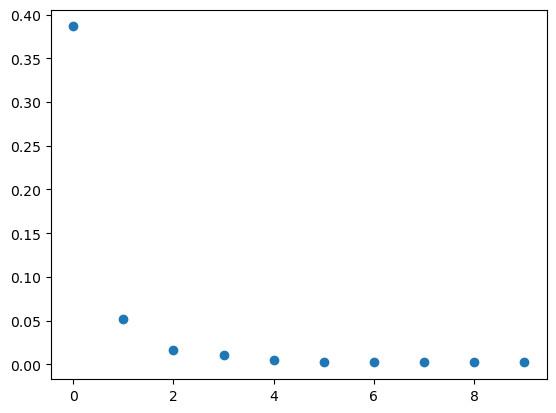

In [12]:
n_components = 10

pca = PCA(n_components)
X_pca = pca.fit_transform(X_scaled)

print(pca.explained_variance_ratio_)
plt.scatter(np.arange(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)


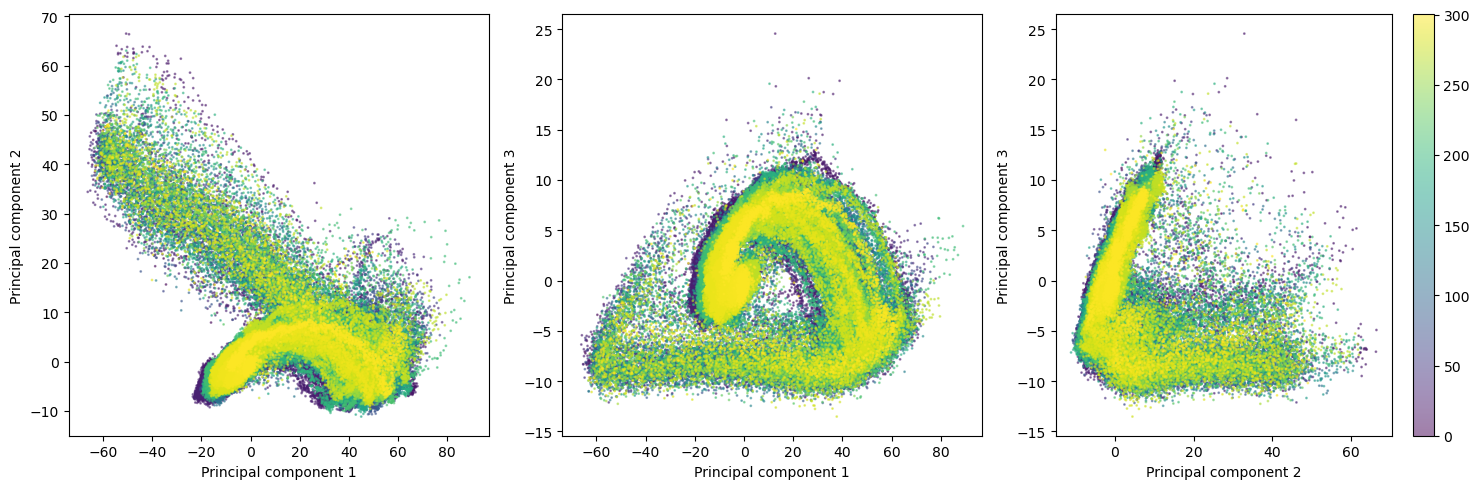

In [13]:
%matplotlib inline
fig = plt.figure(figsize = (15, 5))

plt.subplot(131)

plt.scatter(X_pca[:, 0], X_pca[:, 1],  s = 1, c = t, alpha = 0.5)
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')

plt.subplot(132)

plt.scatter(X_pca[:, 0], X_pca[:, 2],  s = 1, c = t, alpha = 0.5)
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 3')

plt.subplot(133)
plt.scatter(X_pca[:, 1], X_pca[:, 2],  s = 1, c = t, alpha = 0.5)
plt.colorbar()
plt.xlabel('Principal component 2')
plt.ylabel('Principal component 3')
plt.tight_layout()
plt.show()

In [14]:
tsne = TSNE()
X_tsne = tsne.fit_transform(X_pca)

for i, perplexity in enumerate(np.arange(5, 80, 5)):
    tsne = TSNE(perplexity = perplexity)
    X_tsne[i] = tsne.fit_transform(X_pca)

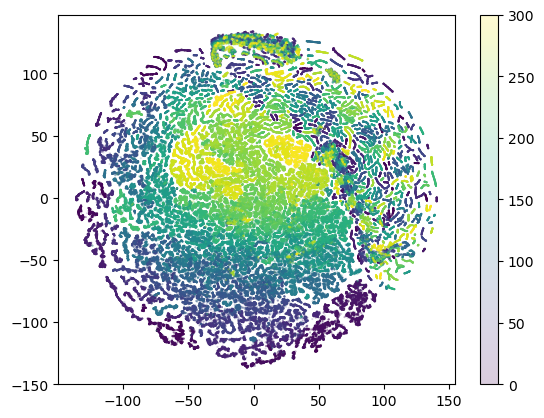

In [28]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], s = 0.2, alpha=0.2, c = t)
plt.colorbar()